# APTO PARA PRÉSTAMO

-Fabrizio Rios
-Leonardo Avila

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('Préstamo_RIOSAVILA_EC1.csv', sep=',')


In [9]:
df.head(20)


,INGRESOS,GASTOS,CREDITO_SCORE,AHORRO_MENSUAL,EDAD,RESULT
0,8270,2343,774,684,39,1
1,1860,3476,679,716,43,0
2,6390,2459,844,3843,61,1
3,6191,6259,726,1469,42,1
4,6734,7194,567,448,34,0
5,7265,2885,716,880,30,1
6,1466,5236,467,487,37,0
7,5426,2302,342,1823,42,0
8,6578,8655,584,2081,21,0
9,9322,8620,696,3419,27,0


Precisión del modelo KNN: 0.70

Reporte de clasificación:

              precision  recall  f1-score  support
0                  0.71    0.83      0.77     24.0
1                  0.67    0.50      0.57     16.0
accuracy           0.70    0.70      0.70      0.7
macro avg          0.69    0.67      0.67     40.0
weighted avg       0.70    0.70      0.69     40.0


C:\Users\PC-01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


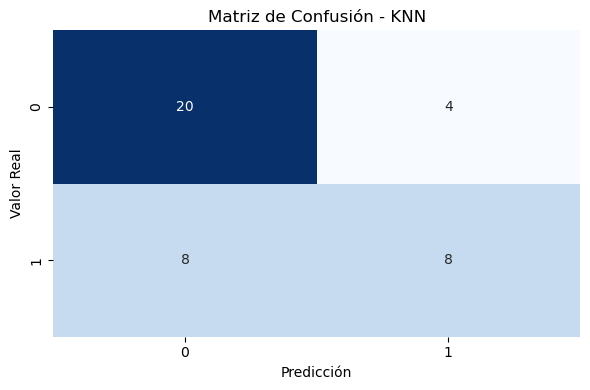

In [10]:


# Separar características (X) y etiqueta (y)
X = df.drop('RESULT', axis=1)
y = df['RESULT']

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar la exactitud con 2 decimales
print(f"Precisión del modelo KNN: {accuracy:.2f}\n")

# Convertir el classification report en DataFrame y redondear
report_df = pd.DataFrame(report).transpose().round(2)

# Mostrar el reporte como tabla
print("Reporte de clasificación:\n")
print(report_df)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Gráfico de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.tight_layout()
plt.show()